# Metallicity Histogram for Kinematic Data & Gaia xgboost

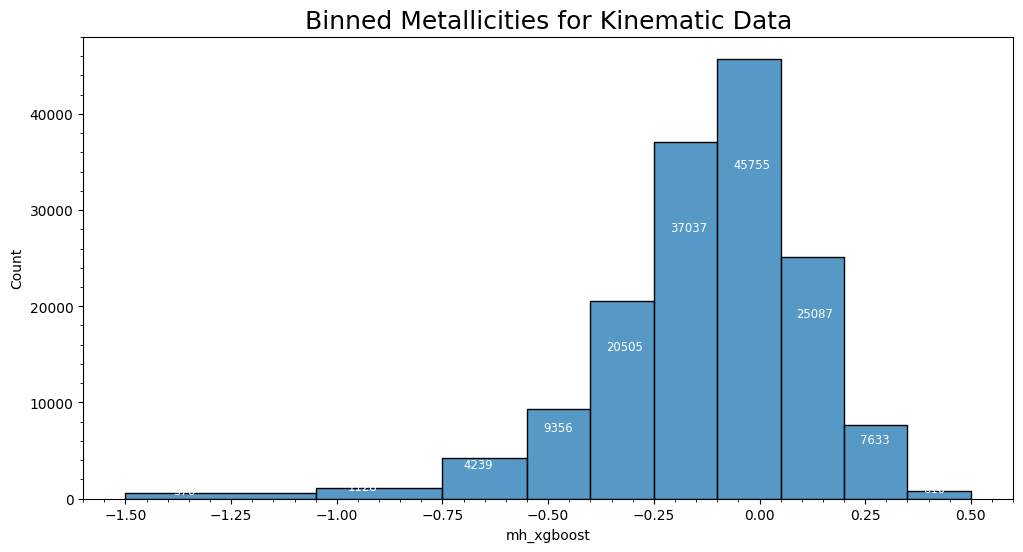

Counts:  [  576  1128  4239  9356 20505 37037 45755 25087  7633   810]
Bin Edges:  [-1.5  -1.05 -0.75 -0.55 -0.4  -0.25 -0.1   0.05  0.2   0.35  0.5 ]


In [1]:
import plotting
import datamanip
from matplotlib import patches

def nokinematichistogram(n, left, right):
    csv = 'tempcsv/prot_nokinematic_xgboost.csv'
    x = 'mh_xgboost'
    title = f'Binned Metallicities for Non-Kinematic Data ({n} Bins)'

    return plotting.histogram(csv=csv, x=x, nbins=n, title=title, figsize=(12,6), binrange=(left, right))


def kinematichistogram(n, left, right):
    # used to create data file with xgboost metallicities
    # fix.writecsv('table-1.csv', 'All_prot_kin.csv', 'source_id', 'source_id', 'tempcsv/prot_kinematic_xgboost.csv')

    csv = 'tempcsv/prot_kinematic_xgboost.csv'
    x = 'mh_xgboost'
    title = f'Binned Metallicities for Kinematic Data'

    return plotting.histogram(csv=csv, x=x, nbins=n, title=title, figsize=(12,6), binrange=[left,right])

n = (-1.5, -1.05, -0.75, -0.55, -0.40, -0.25, -0.10, 0.05, 0.20, 0.35, 0.5)

ax, (counts, binedges) = kinematichistogram(n, -1.5, 0.5)
binedges = binedges.round(3)
plotting.addhistcounts(ax, counts)
plotting.plt.savefig('plots/kinematicplots/metallicitybin_hist.png')
plotting.plt.show()

print('Counts: ', counts)
print('Bin Edges: ', binedges)


# Boxplots with New Metallicity Bins

## Plotting Examples

### Prot vs. bp-rp

/Users/livelaplove/python/SURP-2025/metallicity/datamanip.py:110: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df.groupby(by=[subbin, bin]).size().reset_index(name='counts')


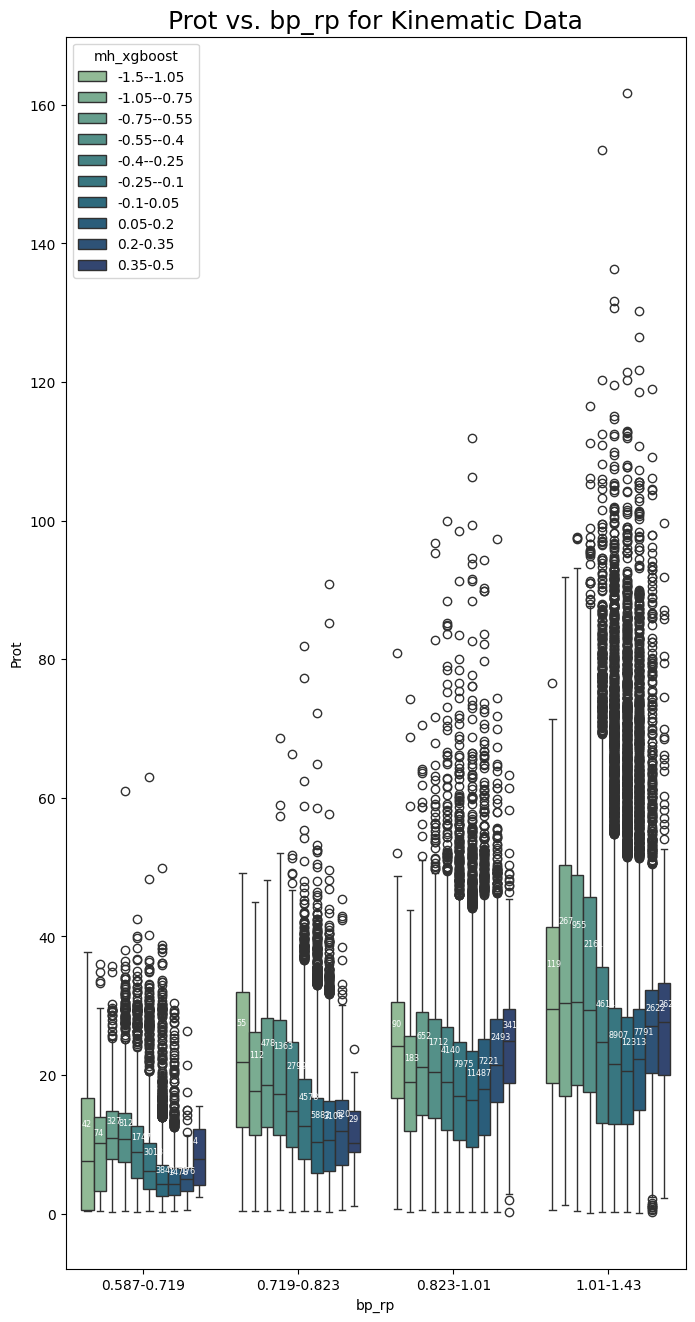

In [2]:
csv = 'tempcsv/prot_kinematic_xgboost.csv'
x = 'bp_rp'
y = 'Prot'
hue = 'mh_xgboost'
xbin = [0.587, 0.719, 0.823, 1.01, 1.43]
xbinlabel = [f'{xbin[i]}-{xbin[i+1]}' for i in range(len(xbin) -1)]
huebin = binedges
huebinlabel = [f'{huebin[i]}-{huebin[i+1]}' for i in range(len(huebin)-1)]
palette = 'crest'
title = 'Prot vs. bp_rp for Kinematic Data'
destination = 'plots/kinematicplots/prot_ci_wholerange.png'

df = datamanip.readcsv(csv, x, xbin, xbinlabel, hue, huebin, huebinlabel)
ax = plotting.boxplotdf(df, x, y, hue, xbinlabel, huebinlabel, palette, title, show=False)
counts = datamanip.findbincounts(df, x, hue)

plotting.addboxcounts(ax, counts, size='xx-small')
plotting.plt.savefig(destination)
plotting.plt.show()


### Prot vs. Teff

/Users/livelaplove/python/SURP-2025/metallicity/datamanip.py:110: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df.groupby(by=[subbin, bin]).size().reset_index(name='counts')


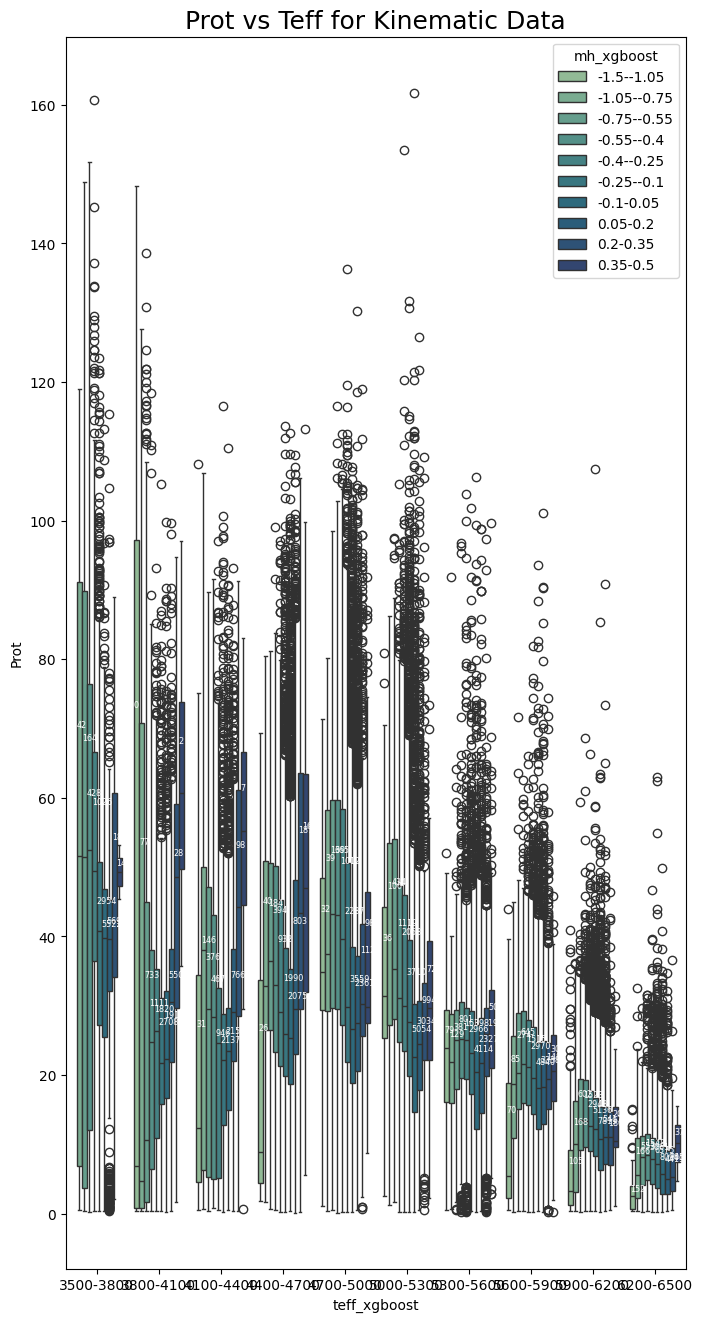

In [3]:
x = 'teff_xgboost'
xbin = tuple(i for i in range(3500, 6750, 300))
xbinlabel = [f'{xbin[i]}-{xbin[i+1]}' for i in range(len(xbin)-1)]

df = datamanip.readcsv(csv, x, xbin, xbinlabel, hue, huebin, huebinlabel)
title = 'Prot vs Teff for Kinematic Data'
destination = 'plots/kinematicplots/prot_teff_wholerange.png'
ax = plotting.boxplotdf(df, x, y, hue, xbinlabel, huebinlabel, palette, title, show=False)
counts = datamanip.findbincounts(df, x, hue)

vzdisps = datamanip.calcvzdisp(df, huebinlabel, x, xbinlabel)
vzdisps

plotting.addboxcounts(ax, counts, size='xx-small')
plotting.plt.savefig(destination)
plotting.plt.show()


# Calculating Vertical Velocity Dispersion per Metallicity Bin

          bp_rp   mh_xgboost  samplesize  vzdisp
0   0.587-0.719   -1.5--1.05          42  62.748
1   0.587-0.719  -1.05--0.75          74  37.297
2   0.587-0.719  -0.75--0.55         327  26.346
3   0.587-0.719   -0.55--0.4         812  20.346
4   0.587-0.719   -0.4--0.25        1747  16.571
5   0.587-0.719   -0.25--0.1        3013  12.807
6   0.587-0.719    -0.1-0.05        3842  10.404
7   0.587-0.719     0.05-0.2        1478   9.835
8   0.587-0.719     0.2-0.35         176   9.667
9   0.587-0.719     0.35-0.5           4  16.177
10  0.719-0.823   -1.5--1.05          55  61.244
11  0.719-0.823  -1.05--0.75         112  58.608
12  0.719-0.823  -0.75--0.55         478  38.097
13  0.719-0.823   -0.55--0.4        1363  30.352
14  0.719-0.823   -0.4--0.25        2799  22.415
15  0.719-0.823   -0.25--0.1        4578  16.791
16  0.719-0.823    -0.1-0.05        5882  13.755
17  0.719-0.823     0.05-0.2        3108  12.253
18  0.719-0.823     0.2-0.35         620  12.044
19  0.719-0.823     

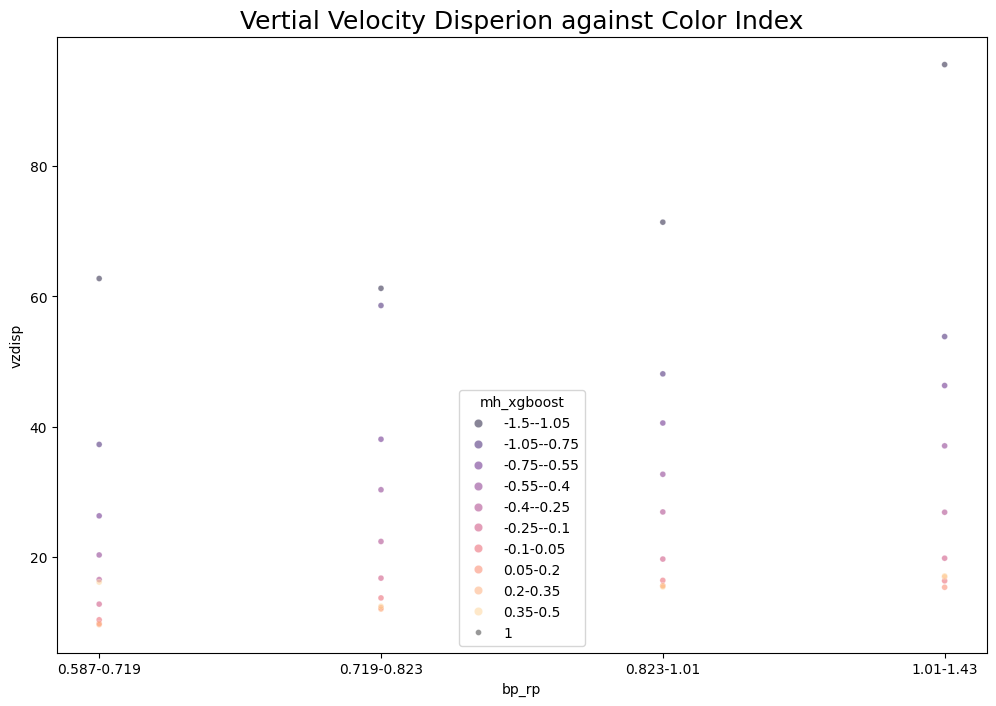

In [ ]:
csv = 'tempcsv/prot_kinematic_xgboost.csv'
x = 'bp_rp'
y = 'vzdisp'
hue = 'mh_xgboost'
xbin = [0.587, 0.719, 0.823, 1.01, 1.43]
xbinlabel = [f'{xbin[i]}-{xbin[i+1]}' for i in range(len(xbin) -1)]
huebin = binedges
huebinlabel = [f'{huebin[i]}-{huebin[i+1]}' for i in range(len(huebin)-1)]
palette = 'magma'
title = 'Vertial Velocity Disperion against Color Index'

df = datamanip.readcsv(csv, x, xbin, xbinlabel, hue, huebin, huebinlabel)
df = datamanip.calcvzdisp(df, huebinlabel, x, xbinlabel)

ax = plotting.scatterplot(df, x, y, hue, huebinlabel, title, palette=palette, show=True, figsize=(12, 8))


## Vzdisps for Teff bins

{'teff_xgboost': 0      3.25K-3.50K
1      3.25K-3.50K
2      3.25K-3.50K
3      3.25K-3.50K
4      3.25K-3.50K
          ...     
119    6.25K-6.50K
120    6.25K-6.50K
121    6.25K-6.50K
122    6.25K-6.50K
123    6.25K-6.50K
Name: teff_xgboost, Length: 124, dtype: object, 'mh_xgboost': 0      -1.05--0.75
1      -0.75--0.55
2       -0.55--0.4
3       -0.4--0.25
4       -0.25--0.1
          ...     
119     -0.4--0.25
120     -0.25--0.1
121      -0.1-0.05
122       0.05-0.2
123       0.2-0.35
Name: mh_xgboost, Length: 124, dtype: object, 'samplesize': 0         2
1         7
2         3
3         6
4        10
       ... 
119    2327
120    4391
121    4381
122    1323
123      83
Name: samplesize, Length: 124, dtype: int64, 'vzdisp': 0      13.111
1      13.926
2       3.132
3      18.521
4      23.132
        ...  
119    13.265
120    11.555
121     9.875
122     9.651
123    11.254
Name: vzdisp, Length: 124, dtype: float64}


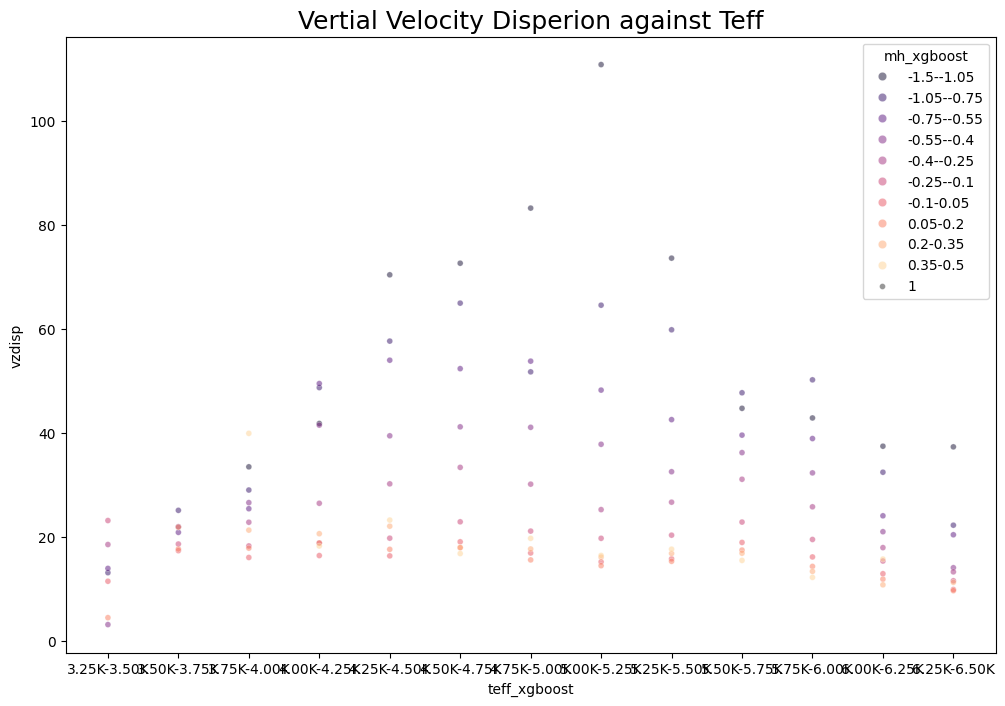

In [ ]:
csv = 'tempcsv/prot_kinematic_xgboost.csv'
x = 'teff_xgboost'
y = 'vzdisp'
hue = 'mh_xgboost'
xbin = xbin = tuple(range(3000, 6750, 250))
xbinlabel = xbinlabel = [f'{xbin[i]/1000:.2f}K-{xbin[i+1]/1000:.2f}K' for i in range(len(xbin) - 1)]
huebin = binedges
huebinlabel = [f'{huebin[i]}-{huebin[i+1]}' for i in range(len(huebin)-1)]
palette = 'magma'
title = 'Vertial Velocity Disperion against Teff'


df = datamanip.readcsv(csv, x, xbin, xbinlabel, hue, huebin, huebinlabel)
df = datamanip.calcvzdisp(df, huebinlabel, x, xbinlabel)

print(df)

ax = plotting.scatterplot(df, x, y, hue, huebinlabel, title, palette=palette, show=True, figsize=(12, 8))

# Scatter Plots

## No Temperature Bins

In [5]:
import datamanip
import plotting

csv = 'tempcsv/prot_kinematic_xgboost.csv'
x = 'teff_xgboost'
y = 'Prot'
hue = 'mh_xgboost'
huebin = (-1.5, -1.05, -0.75, -0.55, -0.40, -0.25, -0.10, 0.05, 0.20, 0.35, 0.5)
huebinlabel = [f'{huebin[i]}-{huebin[i+1]}' for i in range(len(huebin) - 1)]
palette = 'crest'
title = 'Prot vs. Teff (not binned) colored by Metallicity'
show = False

df = datamanip.readcsv(csv, hue=hue, huebin=huebin, huebinlabel=huebinlabel)

if show:
    ax = plotting.scatterplot(df, x, y, hue, huebinlabel, title, palette, True, (28, 16))



## With Temperature Bins (per 250K)

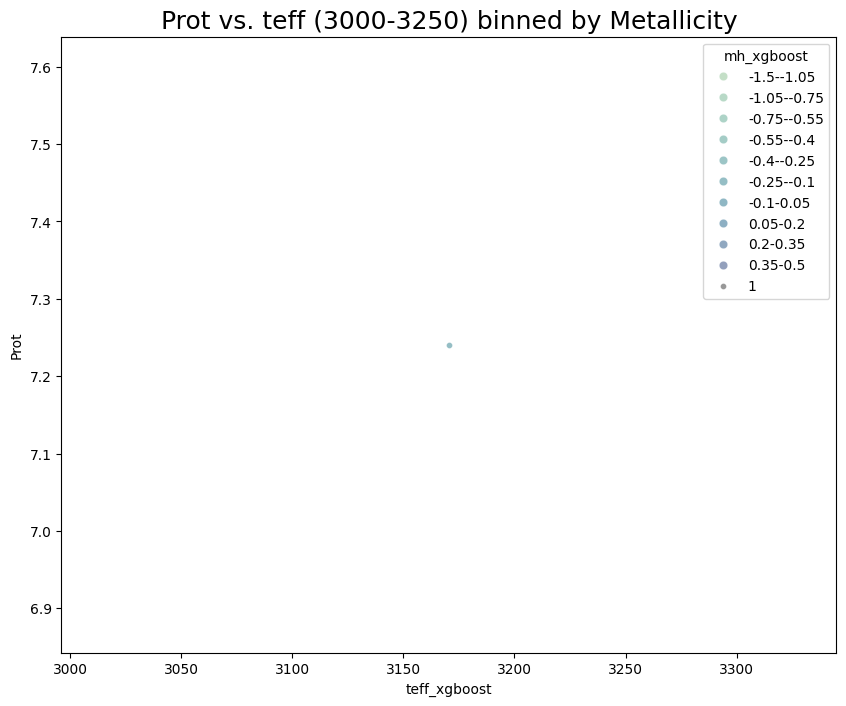

<Figure size 640x480 with 0 Axes>

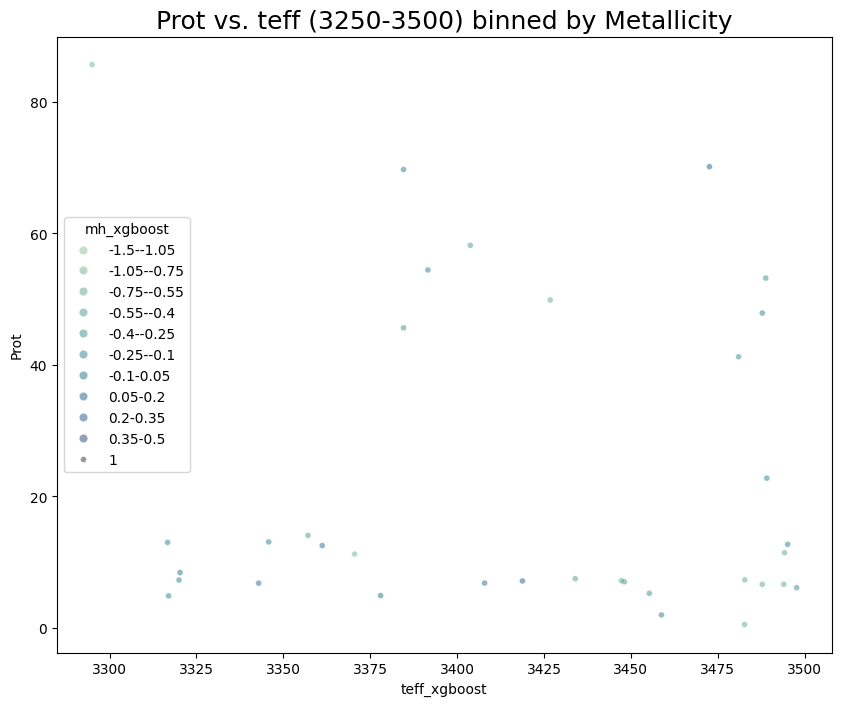

<Figure size 640x480 with 0 Axes>

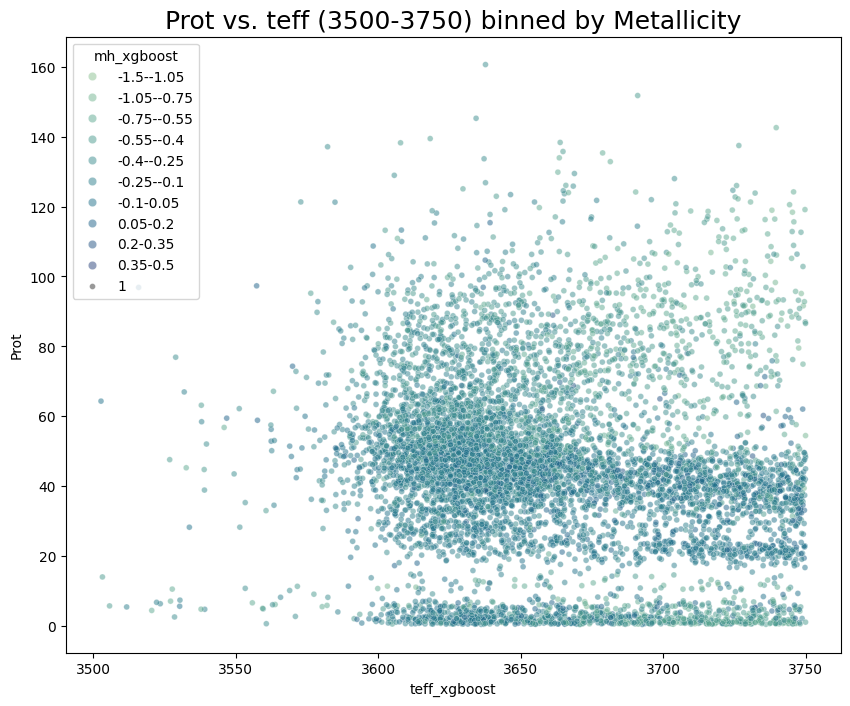

<Figure size 640x480 with 0 Axes>

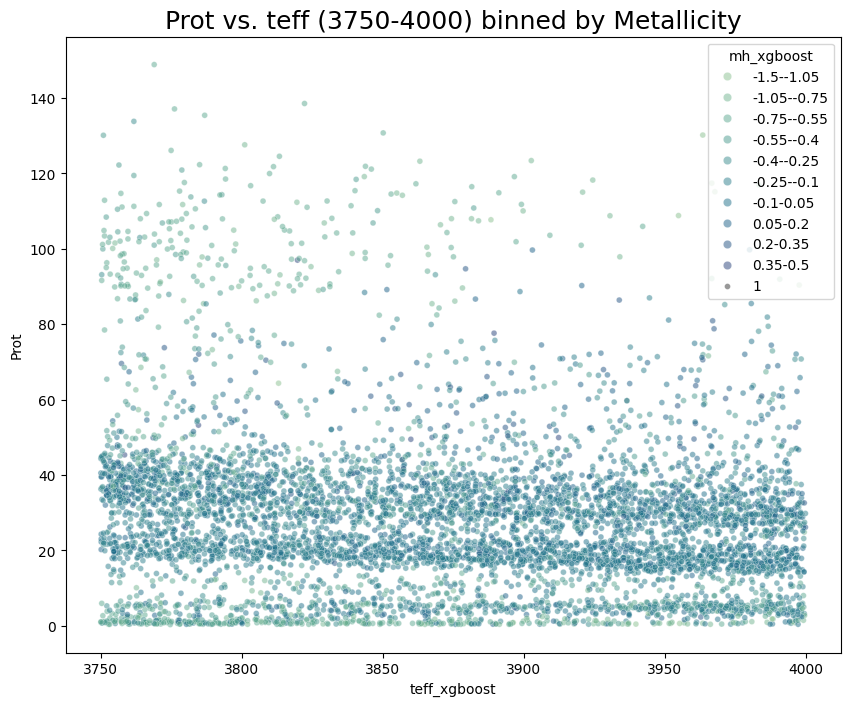

<Figure size 640x480 with 0 Axes>

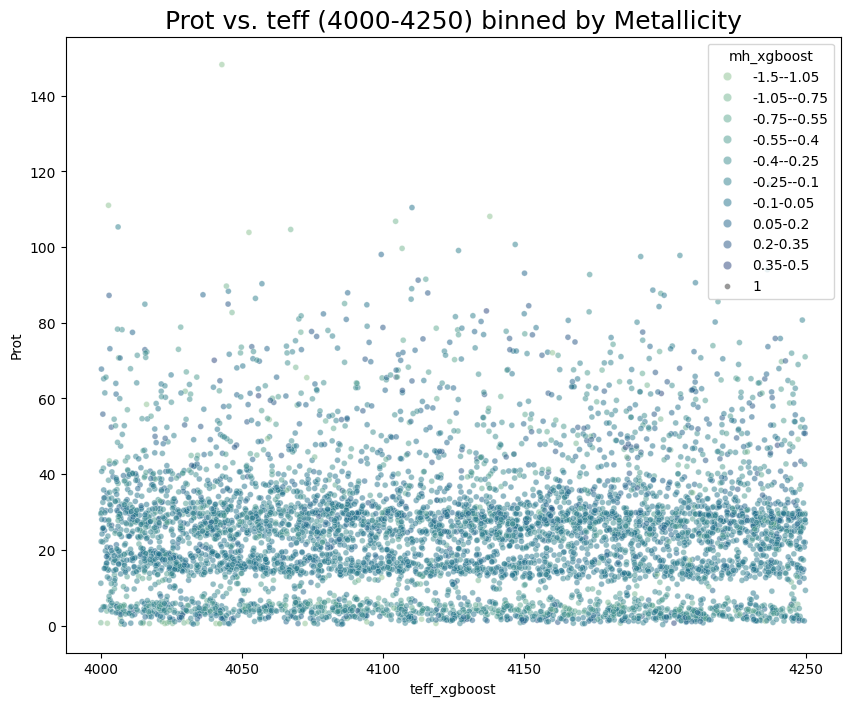

<Figure size 640x480 with 0 Axes>

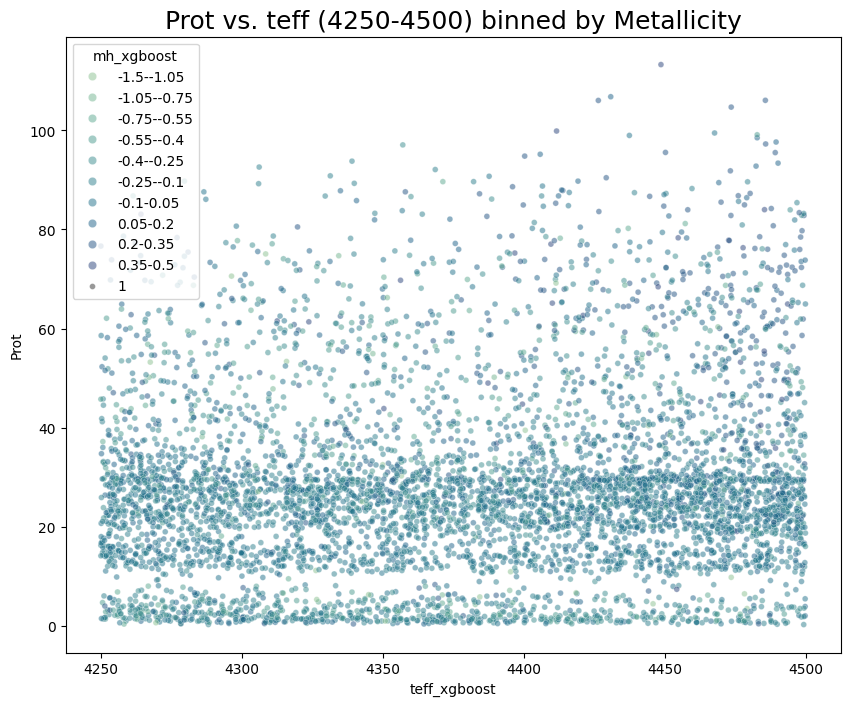

<Figure size 640x480 with 0 Axes>

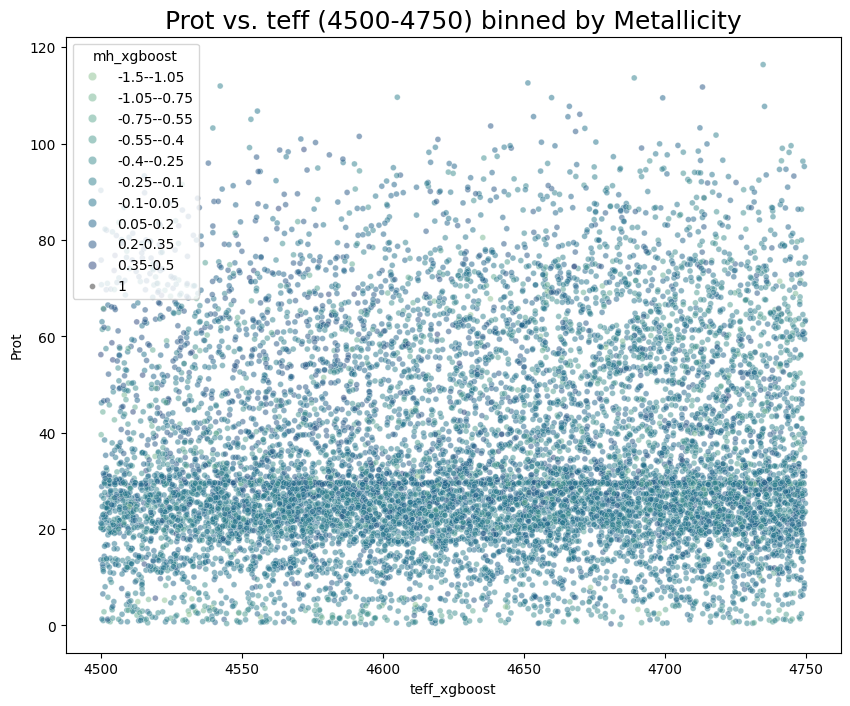

<Figure size 640x480 with 0 Axes>

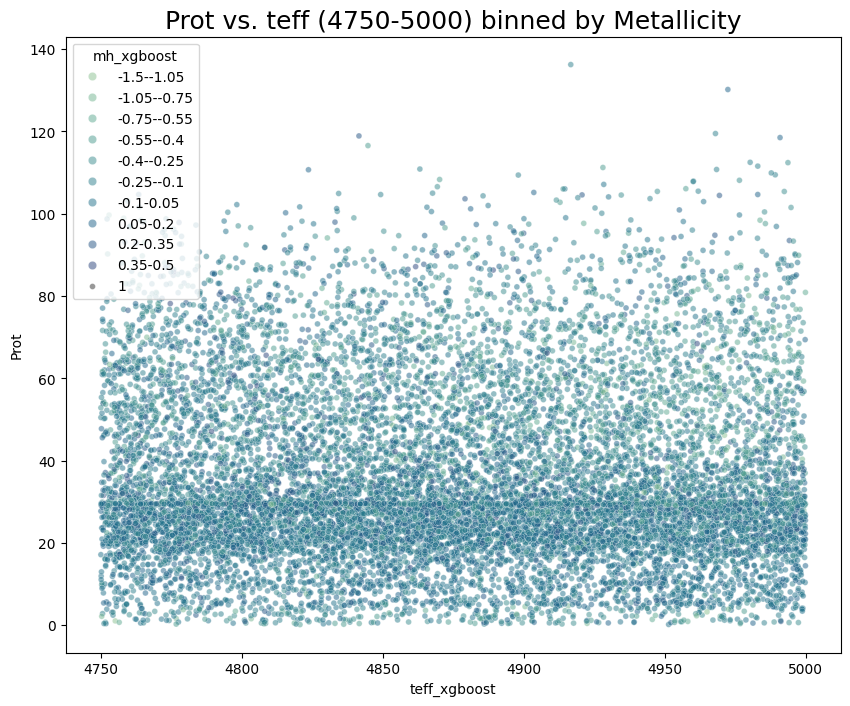

<Figure size 640x480 with 0 Axes>

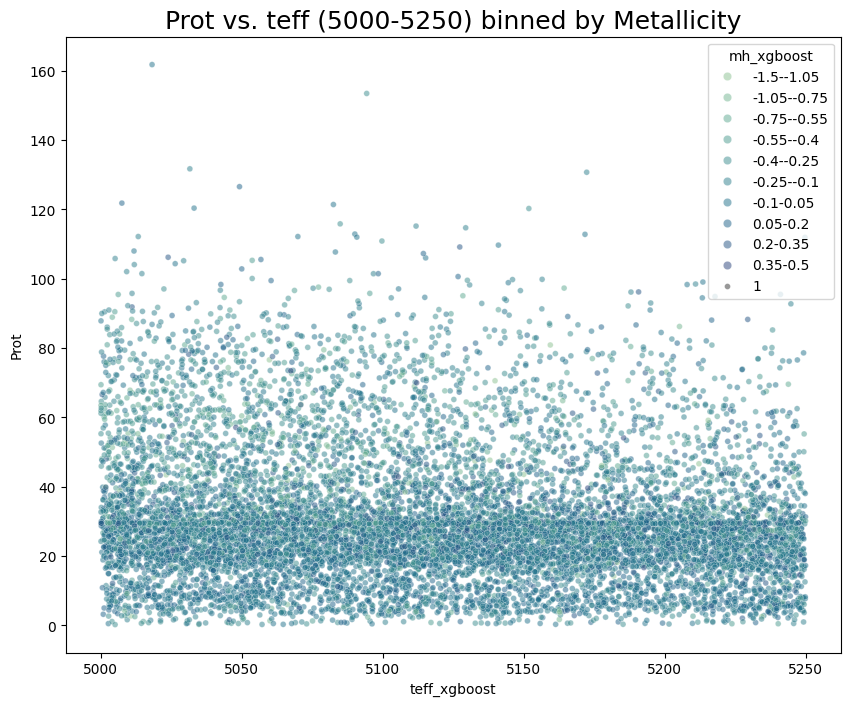

<Figure size 640x480 with 0 Axes>

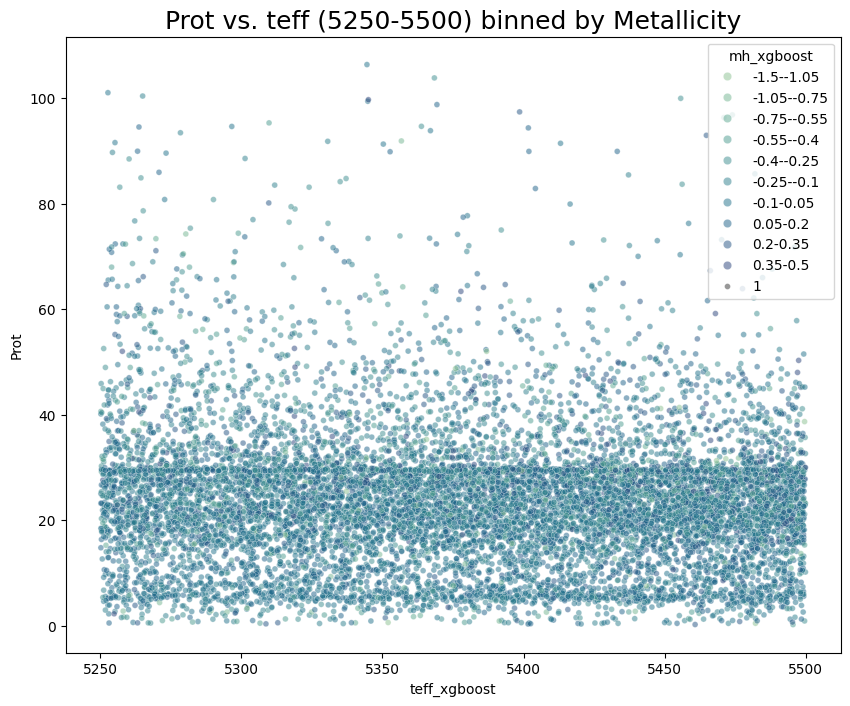

<Figure size 640x480 with 0 Axes>

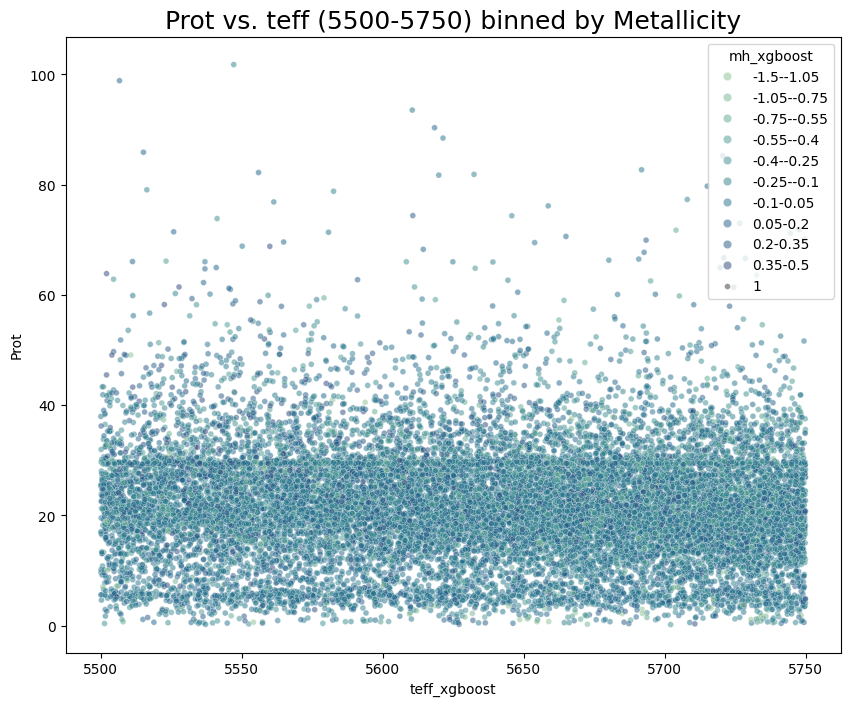

<Figure size 640x480 with 0 Axes>

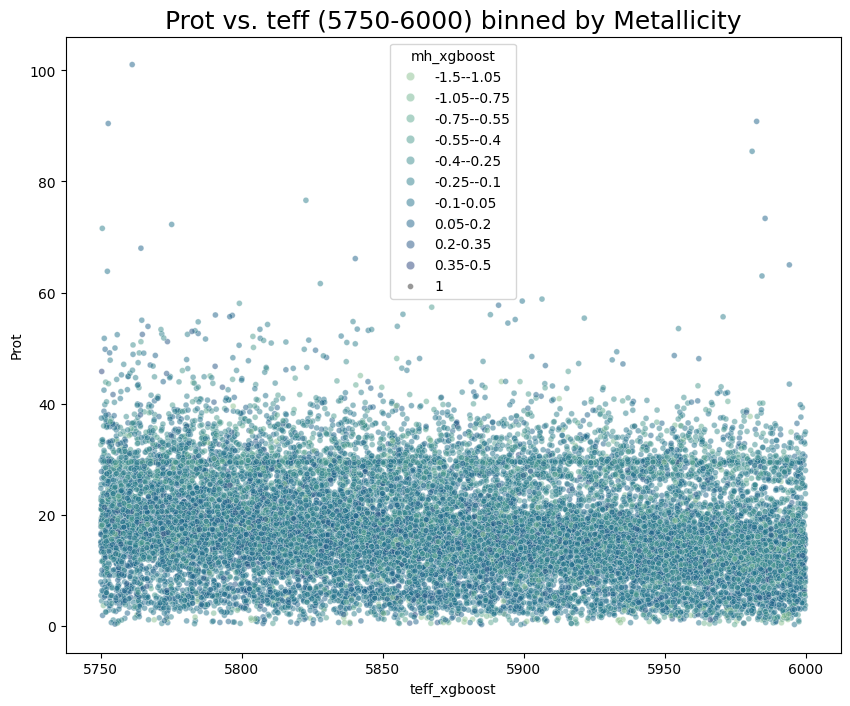

<Figure size 640x480 with 0 Axes>

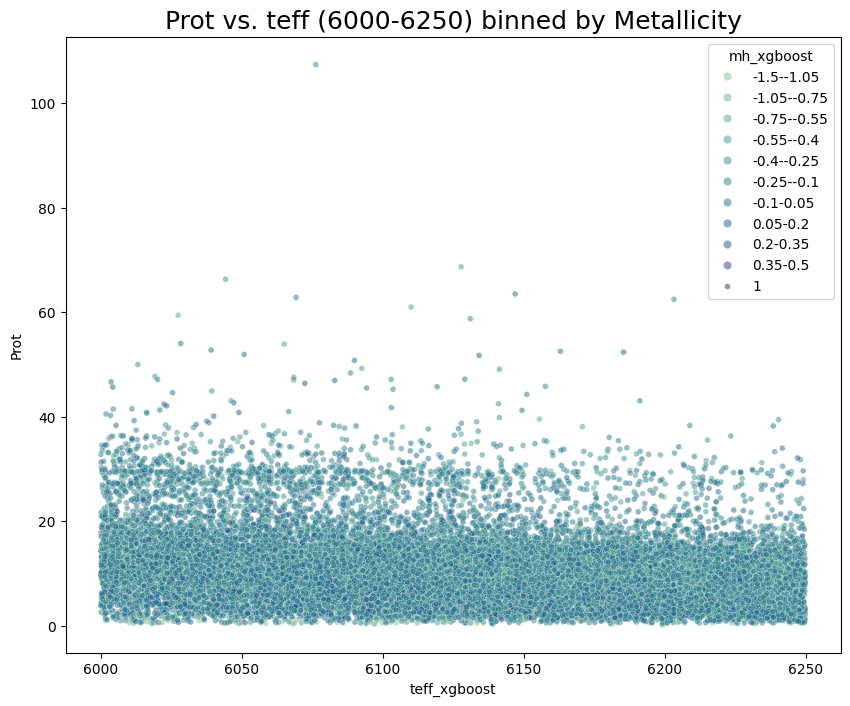

<Figure size 640x480 with 0 Axes>

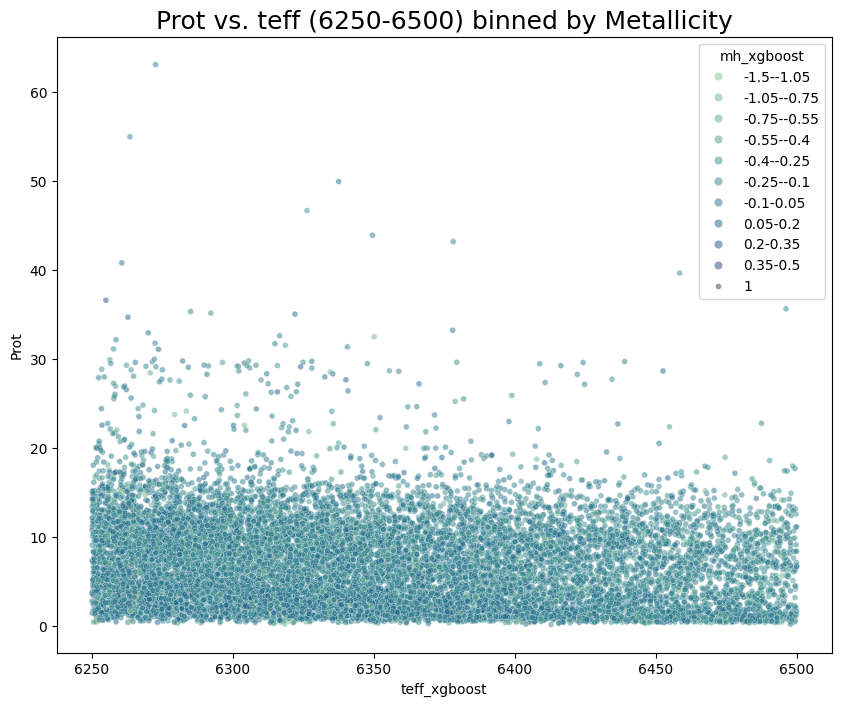

<Figure size 640x480 with 0 Axes>

In [6]:
xbin = tuple(range(3000, 6750, 250))
xbinlabel = [f'{xbin[i]/1000:.2f}-{xbin[i+1]/1000:.2f}' for i in range(len(xbin) - 1)]
title = 'Prot vs. Teff (binned) with Metallicity'

df = datamanip.readcsv(csv, hue=hue, huebin=huebin, huebinlabel=huebinlabel)
ax = plotting.manyscatterplots(df, x, xbin, y, hue, huebinlabel, palette)